Step 1:- Load and Explore the dataset

In [1]:
import pandas as pd


data = pd.read_csv('Obesity.csv')
print(data.head())
print(data.info())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

Step 2:- Data Preprocessing

In [5]:
print(data.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [6]:

target_variable = 'NObeyesdad'
if target_variable not in data.columns:
    raise KeyError(f"{target_variable} not found in the dataset.")

X = data.drop(target_variable, axis=1)
y = data[target_variable]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3:- Define Preprocessing steps

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'CAEC', 'CALC', 'SCC', 'MTRANS']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Step 4:- Define the model

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

Step 5:- Impute Missing Values

In [15]:
from sklearn.impute import SimpleImputer

print("Missing values in X_train:")
print(X_train.isnull().sum())


numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')
numeric_transformer = Pipeline(steps=[
    ('imputer', numeric_imputer),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('onehot', OneHotEncoder())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train_preprocessed = preprocessor.fit_transform(X_train)

print("Preprocessed X_train:")
print(X_train_preprocessed)


Missing values in X_train:
Gender                            6
Age                               0
Height                            7
Weight                            0
family_history_with_overweight    4
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              6
SMOKE                             0
CH2O                              0
SCC                               7
FAF                               0
TUE                               0
CALC                              0
MTRANS                            6
dtype: int64
Preprocessed X_train:
[[-0.47630318 -0.77265477  1.07671674 ...  0.          1.
   0.        ]
 [-0.48604588  0.54366681  1.07671674 ...  0.          1.
   0.        ]
 [-0.2296665  -0.43194802 -2.26869361 ...  0.          1.
   0.        ]
 ...
 [-0.21796835 -0.55779949 -0.7857288  ...  0.          1.
   0.        ]
 [-0.21665009 -0.79233551 -0.67642746 ...  0.          1.
   0.  

In [17]:

X_train_preprocessed = preprocessor.fit_transform(X_train)


print("Missing values in X_train_preprocessed:")
print(pd.DataFrame(X_train_preprocessed).isnull().sum())

Missing values in X_train_preprocessed:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64


Step 6:- Train the Model

In [18]:
from sklearn.ensemble import RandomForestClassifier


model_without_preprocessing = RandomForestClassifier(random_state=42)


model_without_preprocessing.fit(X_train, y_train)


ValueError: could not convert string to float: 'Female'

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_features = ['Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'CAEC', 'CALC', 'SCC', 'MTRANS']


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [20]:
from sklearn.ensemble import RandomForestClassifier

model_without_preprocessing = RandomForestClassifier(random_state=42)


model_without_preprocessing.fit(X_train, y_train)


ValueError: could not convert string to float: 'Female'

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


categorical_features = ['Gender', 'CAEC', 'CALC', 'SCC', 'MTRANS']


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor_without_scaling = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])


model_without_scaling = Pipeline(steps=[
    ('preprocessor', preprocessor_without_scaling),
    ('classifier', RandomForestClassifier(random_state=42))
])


model_without_scaling.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CAEC', 'CALC',
                                                   'SCC', 'MTRANS'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Step 7:- Fit the model, Make Predictions and Evaluate

In [31]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_without_scaling.fit(X_train, y_train)


y_pred_without_scaling = model_without_scaling.predict(X_test)

accuracy_without_scaling = accuracy_score(y_test, y_pred_without_scaling)
conf_matrix_without_scaling = confusion_matrix(y_test, y_pred_without_scaling)
classification_rep_without_scaling = classification_report(y_test, y_pred_without_scaling)

print("Model without Scaling:")
print(f"Accuracy: {accuracy_without_scaling}")
print(f"Confusion Matrix:\n{conf_matrix_without_scaling}")
print(f"Classification Report:\n{classification_rep_without_scaling}")


Model without Scaling:
Accuracy: 0.508274231678487
Confusion Matrix:
[[26  3  1  9 16  1  0]
 [ 6 22  9  6  9  5  5]
 [ 2  1 36 22  7  9  1]
 [ 2  1 13 42  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 7  2  3 15  6 22  1]
 [ 6  3 12 19  4  2  4]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.53      0.46      0.50        56
      Normal_Weight       0.69      0.35      0.47        62
     Obesity_Type_I       0.49      0.46      0.47        78
    Obesity_Type_II       0.37      0.72      0.49        58
   Obesity_Type_III       0.60      1.00      0.75        63
 Overweight_Level_I       0.56      0.39      0.46        56
Overweight_Level_II       0.36      0.08      0.13        50

           accuracy                           0.51       423
          macro avg       0.51      0.50      0.47       423
       weighted avg       0.52      0.51      0.48       423



Step 8:- Plot confusion matrix

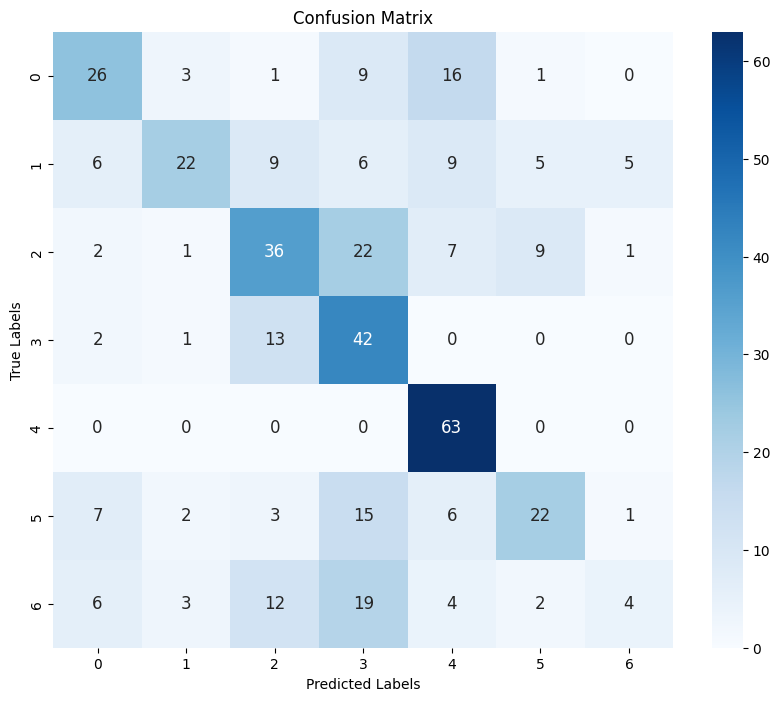

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_without_scaling, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Step 9:- ROC Curve Plot

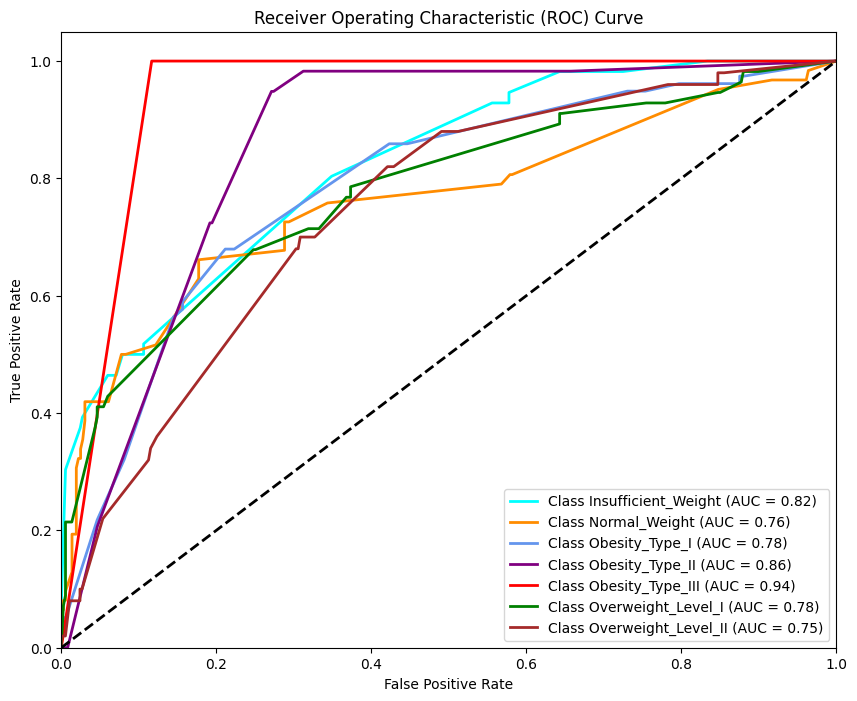

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


y_bin = label_binarize(y_test, classes=model_without_scaling.classes_)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(model_without_scaling.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], model_without_scaling.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'purple', 'red', 'green', 'brown'])

for i, color in zip(range(len(model_without_scaling.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {model_without_scaling.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Step 10:- Violin Plot: Age vs. Weight Category

<ipython-input-52-c55724d30107>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NObeyesdad', y='Age', data=data, order=model_without_scaling.classes_, palette='viridis')


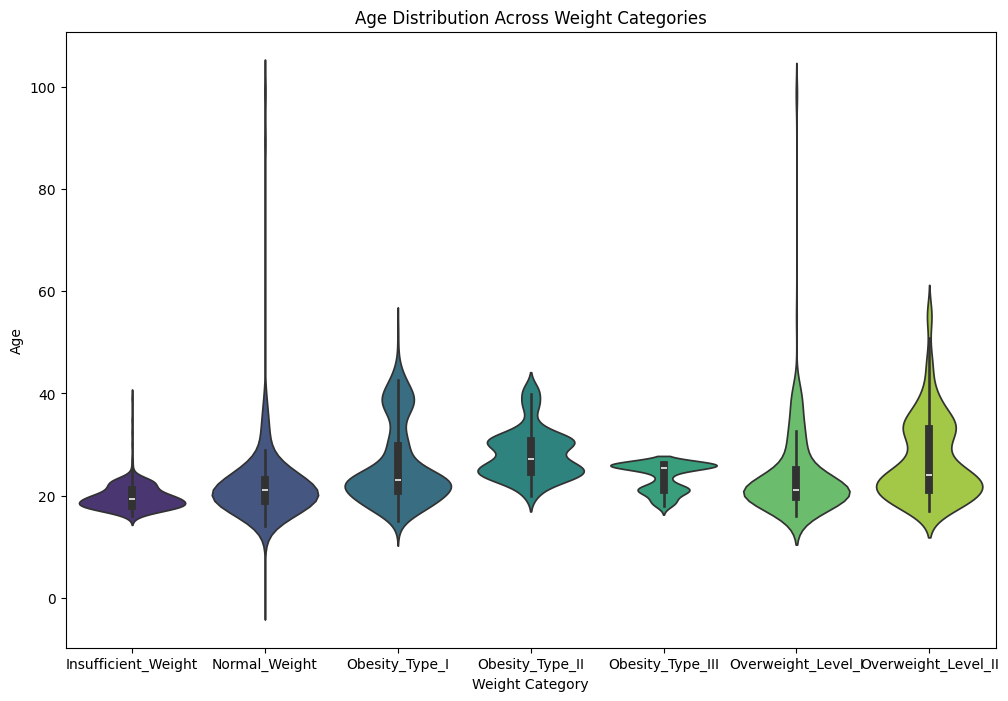

In [52]:

plt.figure(figsize=(12, 8))
sns.violinplot(x='NObeyesdad', y='Age', data=data, order=model_without_scaling.classes_, palette='viridis')
plt.title('Age Distribution Across Weight Categories')
plt.xlabel('Weight Category')
plt.ylabel('Age')
plt.show()

Step 11:- Pair Plot, Count Plot, Box Plot

<Figure size 1500x1500 with 0 Axes>

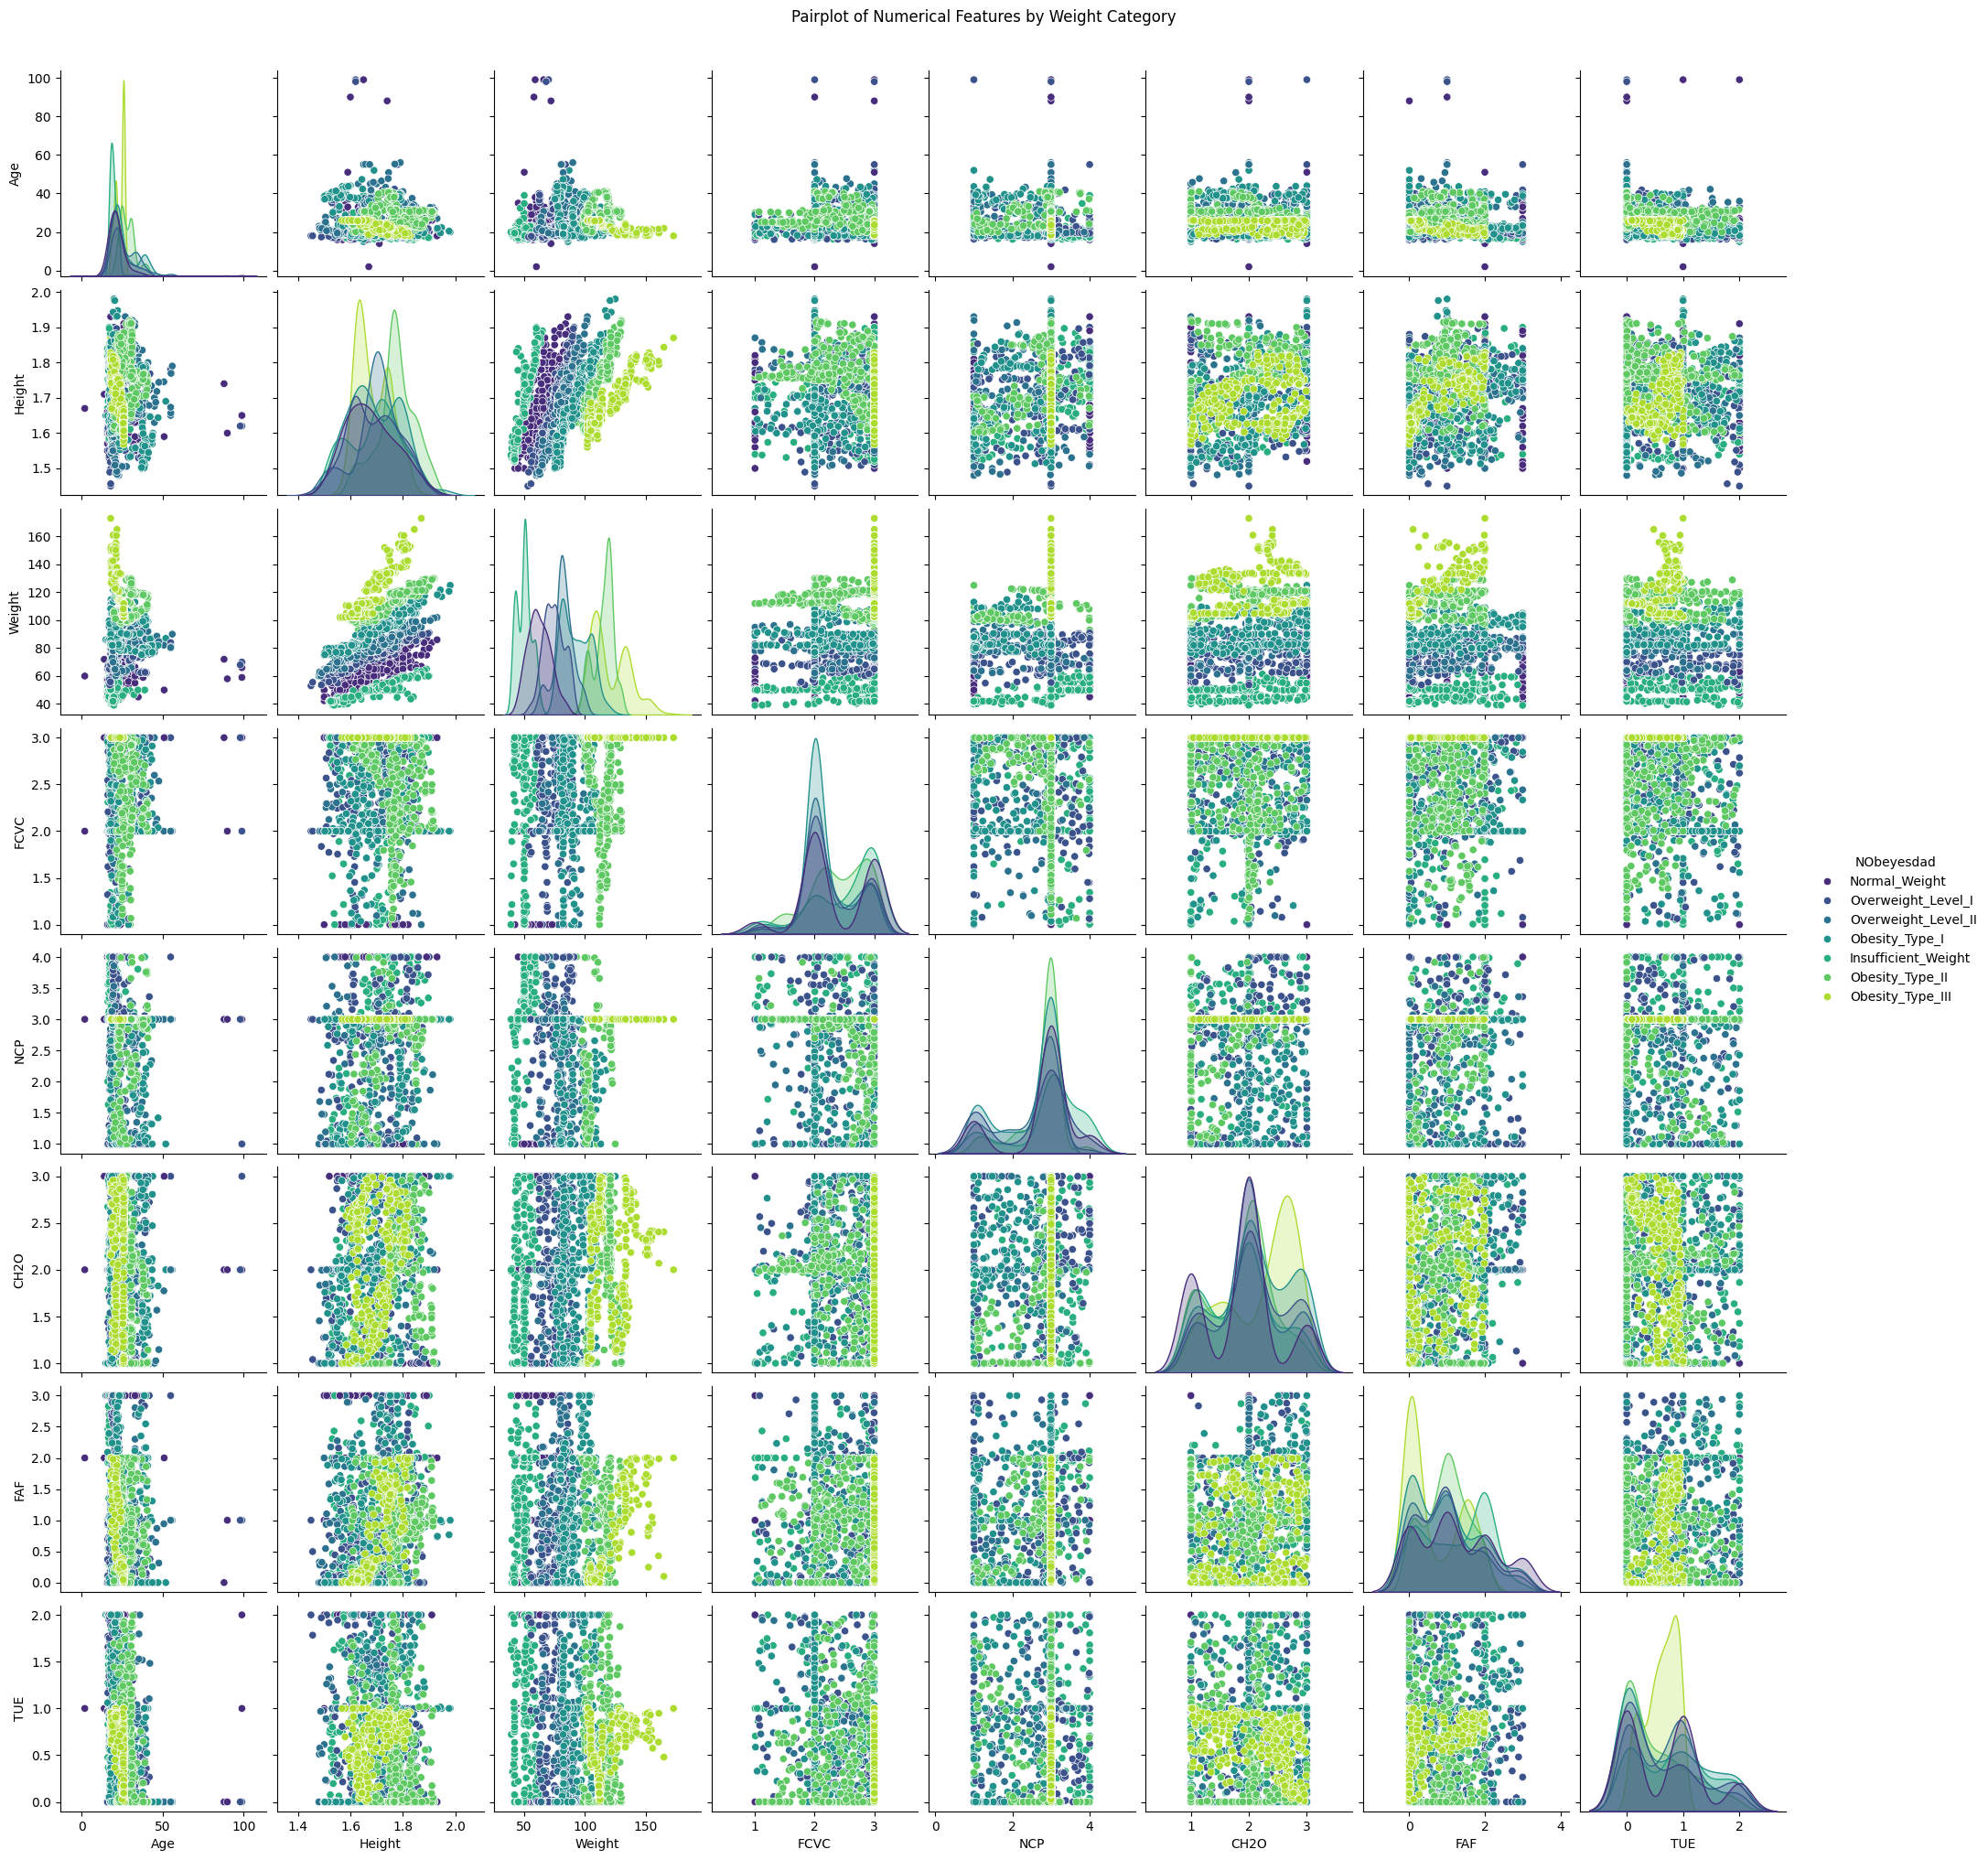

<ipython-input-53-0f85fc39e6e4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=data, order=model_without_scaling.classes_, palette='viridis')


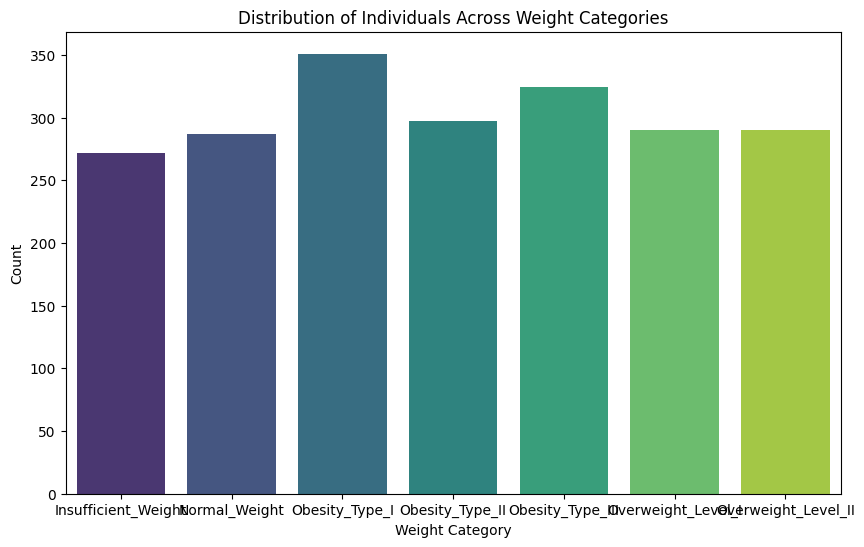

<ipython-input-53-0f85fc39e6e4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Age', data=data, order=model_without_scaling.classes_, palette='viridis')


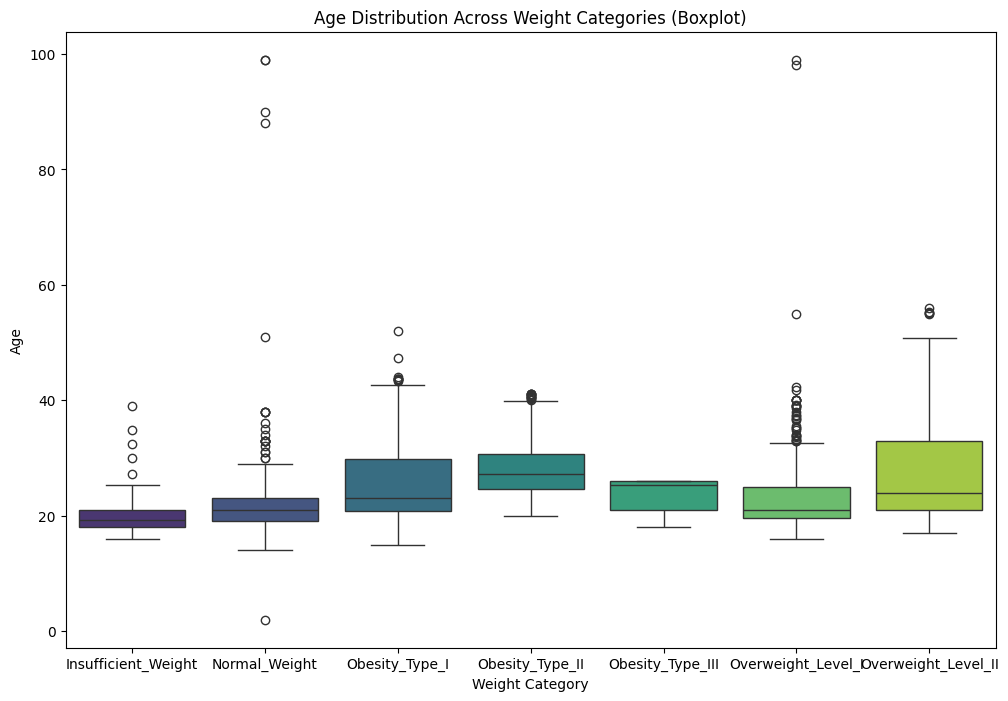

In [53]:

plt.figure(figsize=(15, 15))
sns.pairplot(data, hue='NObeyesdad', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Weight Category', y=1.02)
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=data, order=model_without_scaling.classes_, palette='viridis')
plt.title('Distribution of Individuals Across Weight Categories')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='NObeyesdad', y='Age', data=data, order=model_without_scaling.classes_, palette='viridis')
plt.title('Age Distribution Across Weight Categories (Boxplot)')
plt.xlabel('Weight Category')
plt.ylabel('Age')
plt.show()


Count Plot

<ipython-input-54-500b15698c57>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_without_scaling.classes_, y=y_pred_probs.mean(axis=0), palette='viridis')


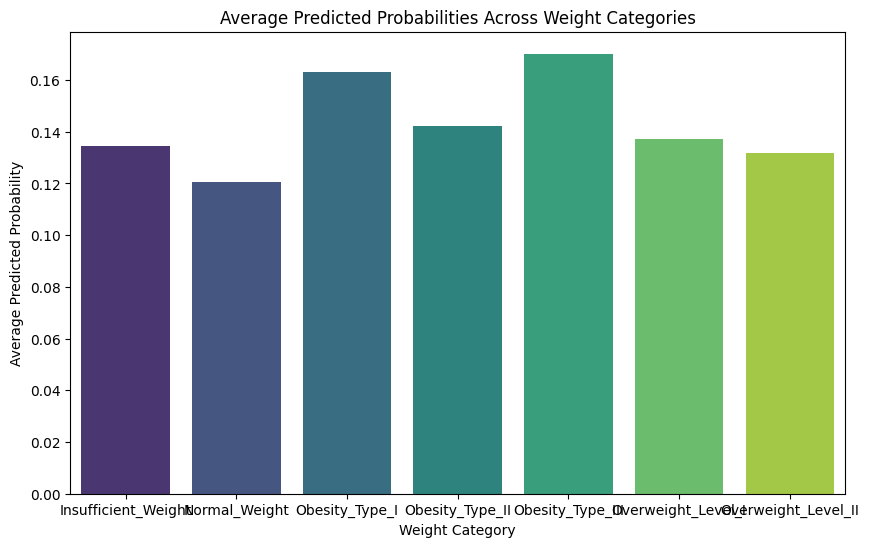

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 2111 and the vector passed to `y` has length 423.

<Figure size 1200x800 with 0 Axes>

In [54]:

y_pred_probs = model_without_scaling.predict_proba(X_test)


plt.figure(figsize=(10, 6))
sns.barplot(x=model_without_scaling.classes_, y=y_pred_probs.mean(axis=0), palette='viridis')
plt.title('Average Predicted Probabilities Across Weight Categories')
plt.xlabel('Weight Category')
plt.ylabel('Average Predicted Probability')
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(x='NObeyesdad', y=y_pred_probs[:, 3], data=data, order=model_without_scaling.classes_, palette='viridis')
plt.title('Predicted Probability (Obesity_Type_II) Across Weight Categories (Boxplot)')
plt.xlabel('Weight Category')
plt.ylabel('Predicted Probability (Obesity_Type_II)')
plt.show()


Box Plot

<ipython-input-55-9dd2842e321c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=y_pred_probs_full[:, 3], data=data, order=model_without_scaling.classes_, palette='viridis')


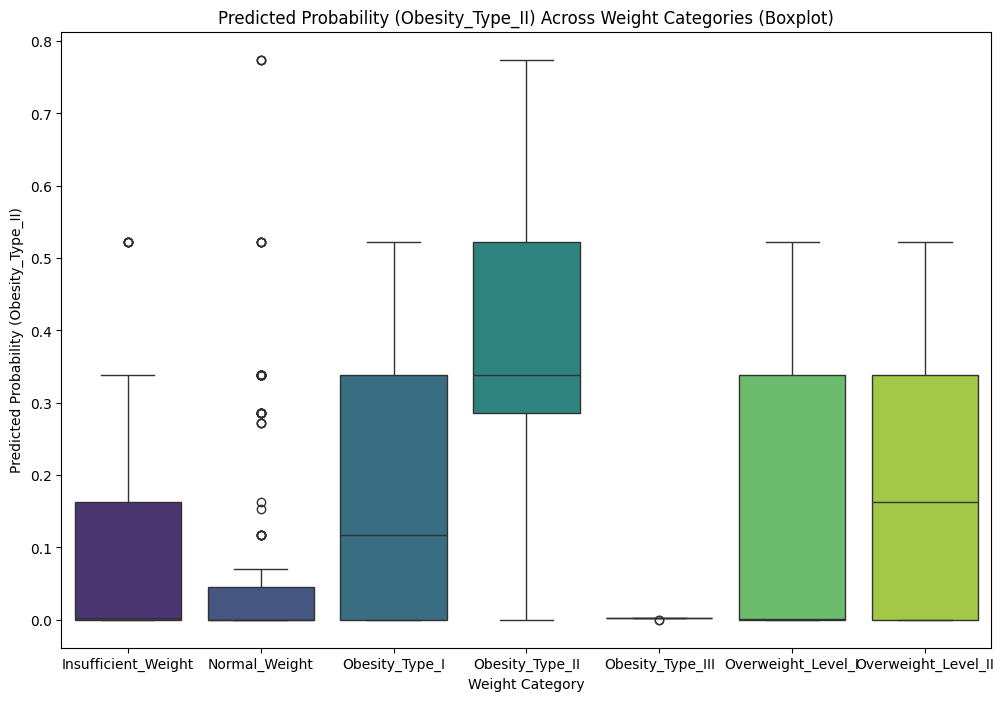

In [55]:

y_pred_probs_full = model_without_scaling.predict_proba(X)


plt.figure(figsize=(12, 8))
sns.boxplot(x='NObeyesdad', y=y_pred_probs_full[:, 3], data=data, order=model_without_scaling.classes_, palette='viridis')
plt.title('Predicted Probability (Obesity_Type_II) Across Weight Categories (Boxplot)')
plt.xlabel('Weight Category')
plt.ylabel('Predicted Probability (Obesity_Type_II)')
plt.show()


Pair Plot

<Figure size 1500x1500 with 0 Axes>

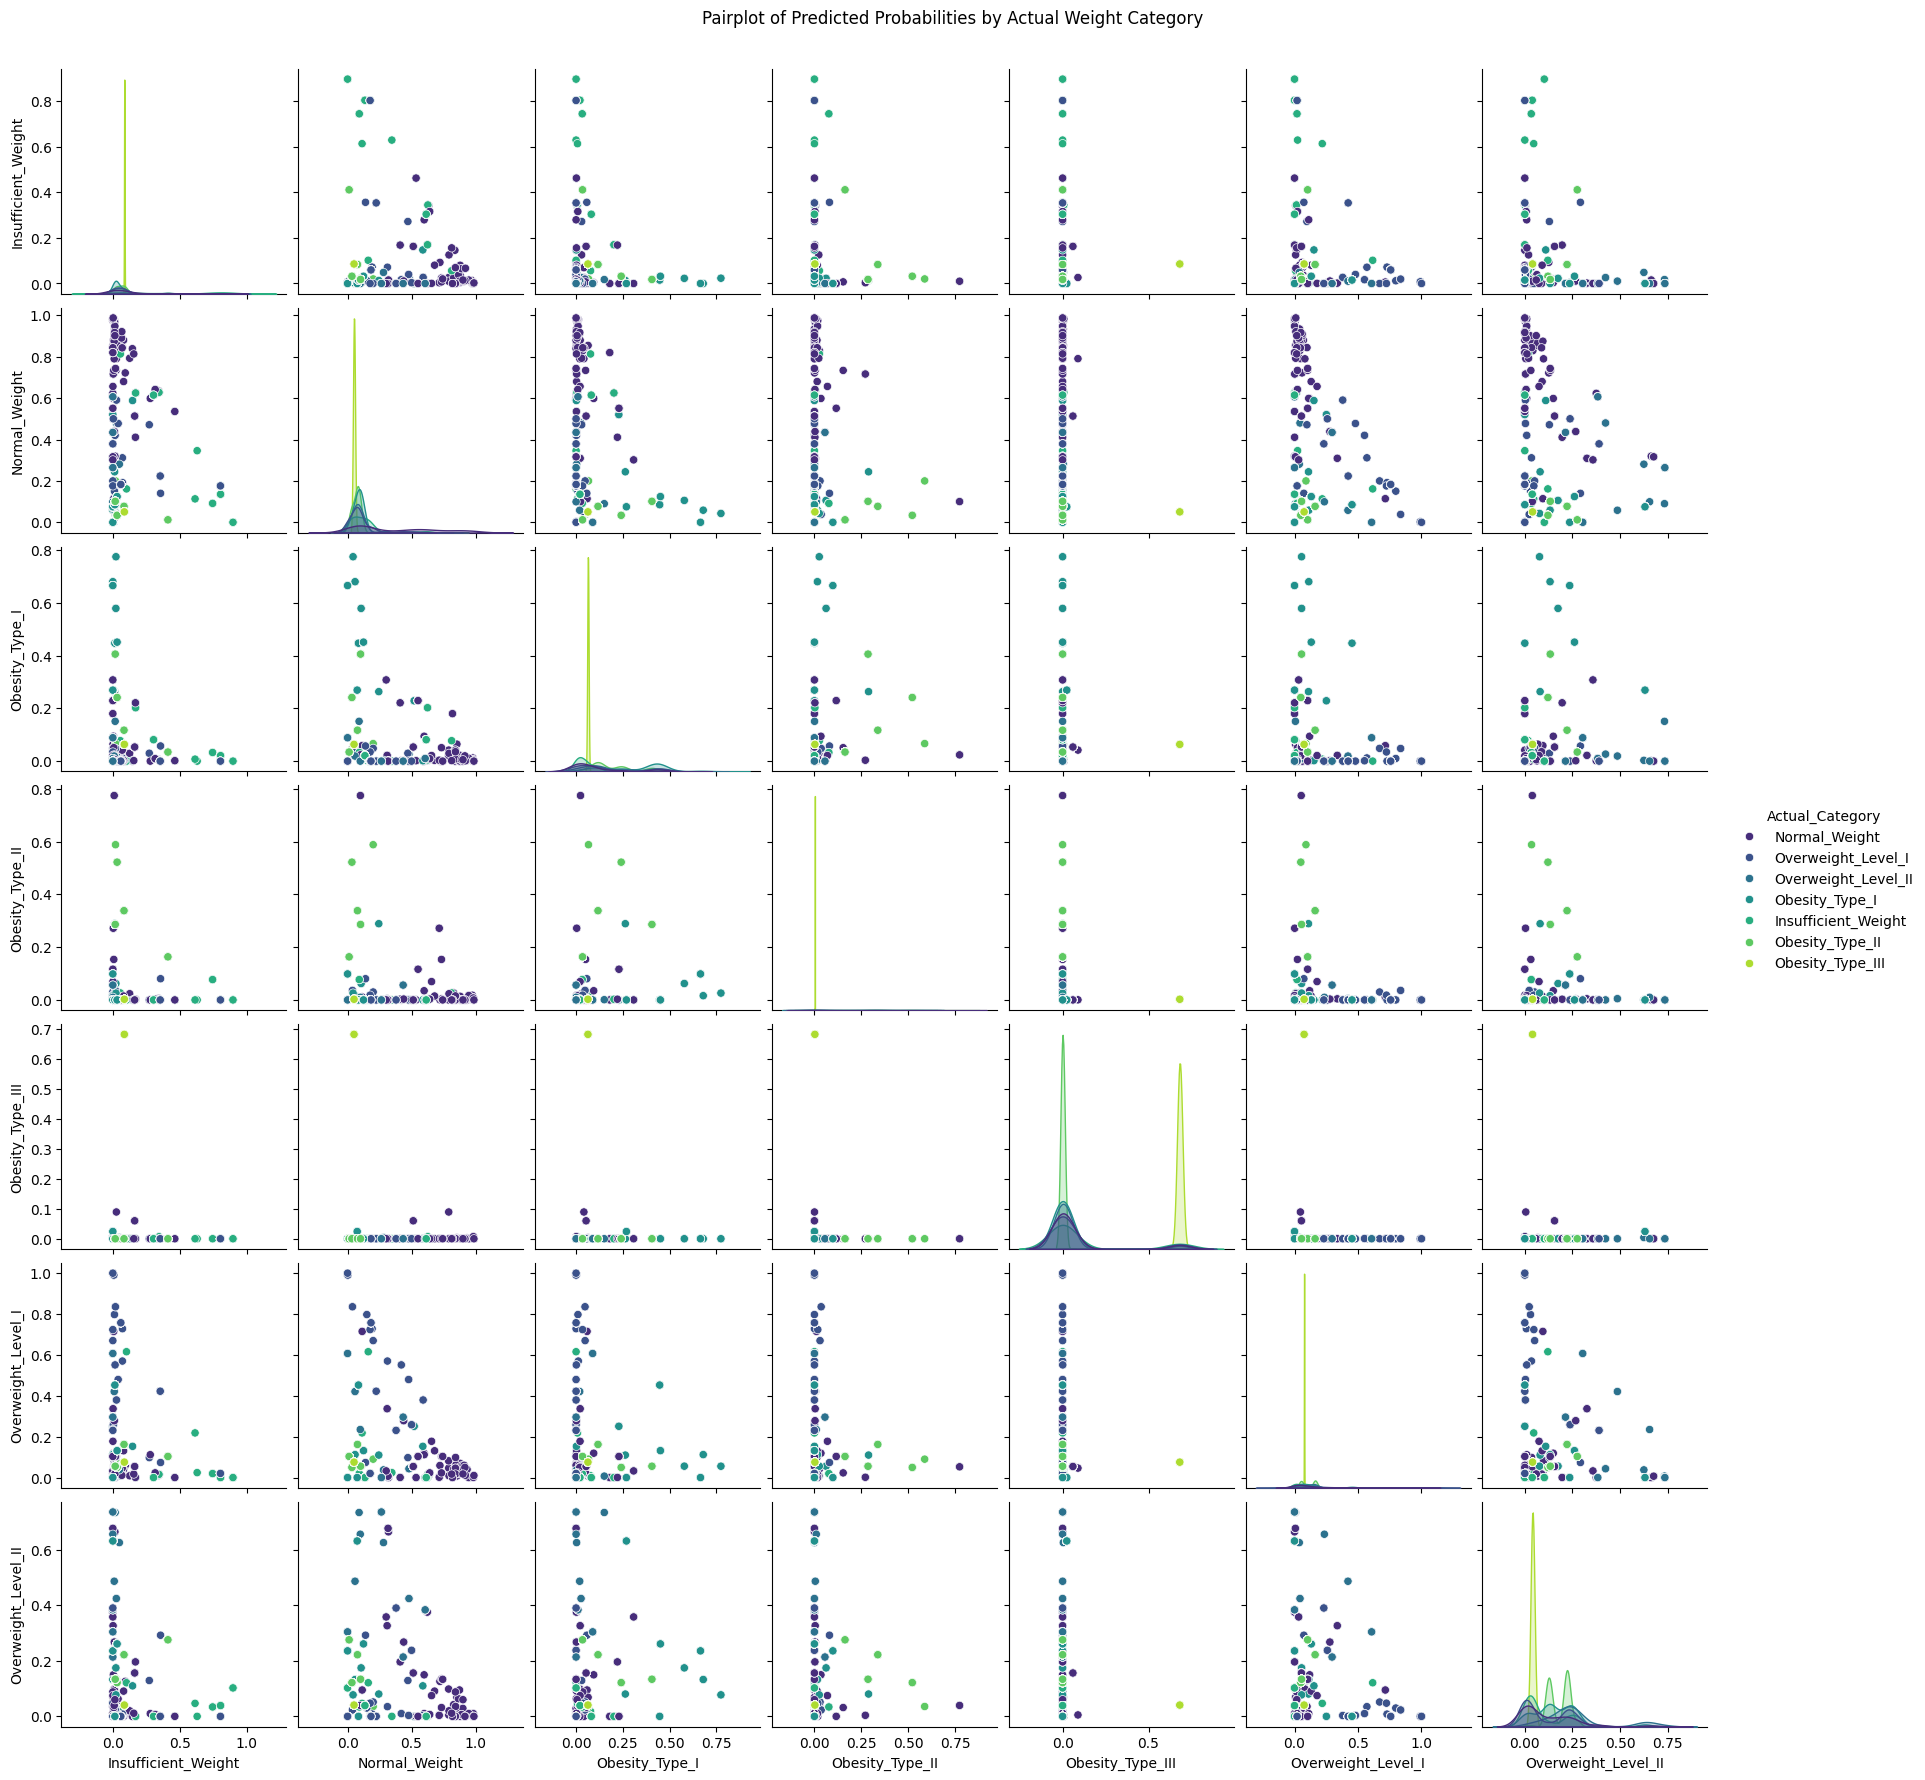

In [56]:

y_pred_probs_full = model_without_scaling.predict_proba(X)

pairplot_data = pd.DataFrame(y_pred_probs_full, columns=model_without_scaling.classes_)
pairplot_data['Actual_Category'] = y

plt.figure(figsize=(15, 15))
sns.pairplot(pairplot_data, hue='Actual_Category', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Predicted Probabilities by Actual Weight Category', y=1.02)
plt.show()
